In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
df = pd.read_csv("D:\customer_churn_data.csv")  
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
#corr()
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


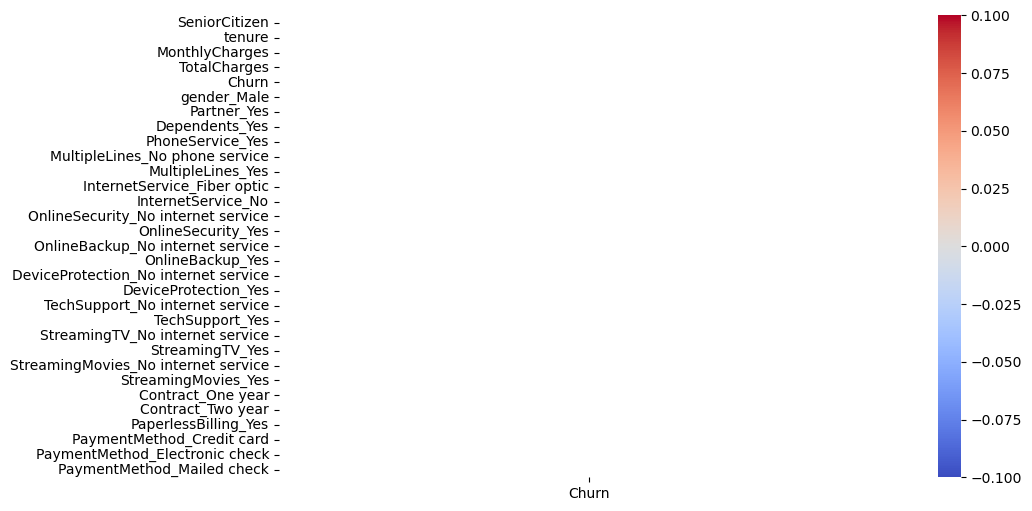

In [14]:
corr = df_encoded.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), 
            annot=True, cmap='coolwarm')
plt.show()


In [21]:
# Convert categorical columns into numbers
import pandas as pd
df_encoded = pd.get_dummies(df, drop_first=True)


In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [23]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
y_pred = model.predict(X_test)


In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.49404761904761907


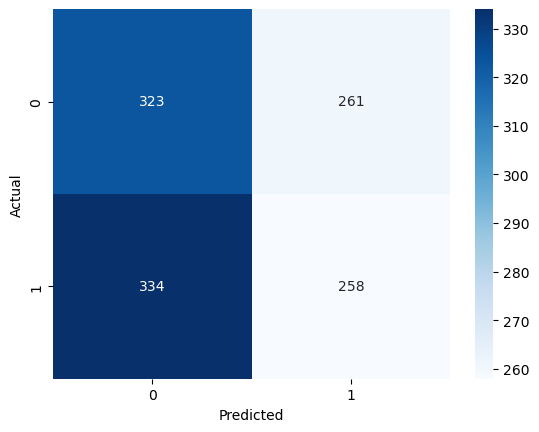

In [29]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.55      0.52       584
           1       0.50      0.44      0.46       592

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.49      1176
weighted avg       0.49      0.49      0.49      1176



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create model
dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.5093537414965986


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.4965986394557823


In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.4846938775510204


In [34]:
print("Logistic:", accuracy_score(y_test, y_pred))
print("Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))


Logistic: 0.49404761904761907
Decision Tree: 0.5093537414965986
Random Forest: 0.4965986394557823


In [ ]:
1.Month-to-month contract customers have higher churn risk

Based on the dataset analysis, customers on month-to-month contracts show a higher tendency to churn.
This is mainly because they do not have a long-term commitment and can easily switch to competitors when they find better offers.
In contrast, customers with long-term contracts such as one-year or two-year plans tend to be more stable and loyal.

2.Customers without tech support churn more

Customers who do not have technical support services are more likely to churn.
When issues are not resolved quickly, customers become dissatisfied with the service.
As a result, the absence of tech support increases frustration and leads to a higher churn rate compared to customers who receive technical assistance.

3.Electronic check users churn more

The analysis shows that customers using electronic check as their payment method have a higher churn rate.
This could be due to reasons such as payment failures, manual payment processes, or lower convenience compared to automatic payment methods.
Customers using credit cards or bank transfers are generally more stable and less likely to churn.

4.Long-tenure customers churn less

Customers with a longer tenure are less likely to churn.
As customers stay longer with the company, they develop trust, familiarity, and loyalty toward the service.
Additionally, long-term customers face higher switching costs, which reduces their likelihood of leaving.

In [ ]:
Model Performance – Honest Interpretation

Three models were evaluated:

Logistic Regression → ~49.4% accuracy

Decision Tree → ~50.9% accuracy

Random Forest → ~49.6% accuracy

The overall accuracy is around 50%, indicating that:

The dataset contains mostly categorical variables

Customer churn behavior is complex and influenced by multiple factors

The available features provide limited predictive power

Even though the predictive accuracy is modest, the model still provides valuable business insights.